In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red')
    return

In [18]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target
feature_names = boston.feature_names

In [29]:
X_rm = X[:,5].reshape((-1,1))
slr_rm = LinearRegression()
slr_rm.fit(X_rm, y)
print(slr_rm.coef_, slr_rm.intercept_)

[ 9.10210898] -34.6706207764


43.6005517712
0.483525455991


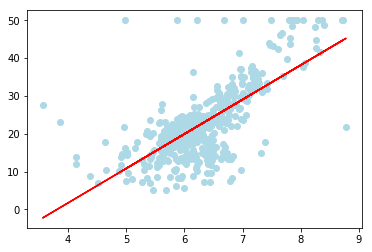

In [30]:
print(mean_squared_error(y, slr_rm.predict(X_rm)))
print(r2_score(y, slr_rm.predict(X_rm)))
lin_regplot(X_rm, y, slr_rm)

In [32]:
X_crim = X[:,0].reshape((-1,1))
slr_crim = LinearRegression()
slr_crim.fit(X_crim, y)
print(slr_crim.coef_, slr_crim.intercept_)

[-0.41277468] 24.0162197635


71.8523466653
0.148866092919


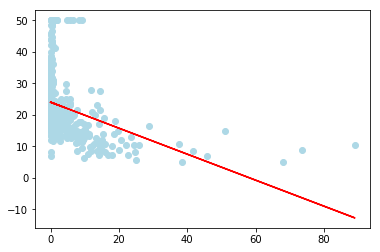

In [33]:
print(mean_squared_error(y, slr_crim.predict(X_crim)))
print(r2_score(y, slr_crim.predict(X_crim)))
lin_regplot(X_crim, y, slr_crim)

In [34]:
from sklearn.model_selection import train_test_split
X_rm_train, X_rm_test, y_train, y_test = train_test_split(
    X_rm, y, test_size=0.3, random_state=0)

In [35]:
slr_rm_ho = LinearRegression()
slr_rm_ho.fit(X_rm_train, y_train)
y_train_pred = slr_rm_ho.predict(X_rm_train)
y_test_pred = slr_rm_ho.predict(X_rm_test)

In [39]:
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

42.1576508631
47.0330474798
0.502649763004
0.435143648321


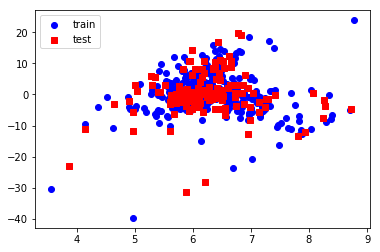

In [38]:
plt.scatter(X_rm_train[:,0], y_train_pred - y_train,
            c='blue', marker='o', label='train')
plt.scatter(X_rm_test[:,0], y_test_pred - y_test,
            c='red', marker='s', label='test')
plt.legend()

In [40]:
lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)
print(r2_score(y, y_pred))

0.740607742865


In [44]:
#交差検証する
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)
Rsq = []
for train, test in kf.split(X):
    lr = LinearRegression()
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    lr.fit(X_train, y_train)
    y_test_pred = lr.predict(X_test)
    Rsq.append(r2_score(y_test, y_test_pred))
print(sum(Rsq)/5)

0.350741350933


In [48]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)
Rsq = []
X1 = X[:,1:]
for train, test in kf.split(X1):
    lr = LinearRegression()
    X_train, X_test = X1[train], X1[test]
    y_train, y_test = y[train], y[test]
    lr.fit(X_train, y_train)
    y_test_pred = lr.predict(X_test)
    Rsq.append(r2_score(y_test, y_test_pred))
print(sum(Rsq)/5)

0.383594683192


In [53]:
import numpy as np
np.corrcoef(X.T,y)[:,-1]

array([-0.38583169,  0.36044534, -0.48372516,  0.17526018, -0.42732077,
        0.69535995, -0.37695457,  0.24992873, -0.38162623, -0.46853593,
       -0.50778669,  0.33346082, -0.73766273,  1.        ])

In [56]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)
Rsq = []
X2 = X[:,[2,4,5,9,10,12]]
for train, test in kf.split(X2):
    lr = LinearRegression()
    X_train, X_test = X2[train], X2[test]
    y_train, y_test = y[train], y[test]
    lr.fit(X_train, y_train)
    y_test_pred = lr.predict(X_test)
    Rsq.append(r2_score(y_test, y_test_pred))
print(sum(Rsq)/5)

0.367226037859


In [73]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

R^2 train: 0.753, test: 0.653
